
A Data-Driven Approach to Understanding Diabetes Risk Factors

Dataset
Note: This dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases.

Data Overview
The dataset contains the following columns:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure
- SkinThickness: Triceps skinfold thickness
- Insulin: 2-Hour serum insulin
- BMI: Body mass index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Credict: Kaggle.com

Author: Tinotenda H. Biningu ©

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import dataframe_image as dfi
%matplotlib inline
sns.set_style("darkgrid")


In [2]:
diab_df = pd.read_csv("diabetes.csv")
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check the format of the Data.
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Check for missing values
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Check the Duplicate Fields
diab_df.duplicated().sum()

0

In [6]:
#Descriptive Statistics for continuous fields.
b=diab_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].describe()
dfi.export(b,"a.jpg")
b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Summary Highlights:**
- There are 768 patients or groups under study
- The dataset has 8 independent features with the target vairiable outcome ehich describes whether a person has diabetes or not based on his/or health status.
- The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
- The mean age is 33 and min age is 21 and max age of people is 81.
- Maximum glucose level is 199 which indicates prediabetes. Blood pressure level is normal.
- There are no missing values or duplicates in the data however, the minimum of some datafields are zeros which is not reasonable since a health factor(measure) can't be zero.  

### Data Cleaning and Wrangling

In this section we handle missing values by imputtation. There are no missing values or duplicates in the data however some datafields contains zeros which is not reasonable as a health factor(measure) can't be zero. Some independent variable such as SkinThickness,Insulin,Glucose level,Bloodpressur,Body Mass Index(BMI) has zero inputs but those measure cannot be zero. So we treat those value  as missing values and correct them by imputting those fields with their medians and means.

In [7]:
# Correct 0 values in SkinThickness
diab_df['SkinThickness'] = diab_df['SkinThickness'].replace(0,diab_df['Insulin'].median())

# Correct 0 values in Insulin 
diab_df['Insulin'] = diab_df['Insulin'].replace(0, diab_df['Insulin'].median())

# Correct 0 values in Glucose
diab_df['Glucose'] = diab_df['Glucose'].replace(0,diab_df['Glucose'].mean())

# Correct 0 values in BloodPressure
diab_df['BloodPressure'] =diab_df['BloodPressure'].replace(0,diab_df['BloodPressure'].mean())

# Correct 0 values in BMI
diab_df['BMI'] = diab_df['BMI'].replace(0, diab_df['BMI'].median())

In [8]:
#we check the descriptive statistics for the dataset again.
c=diab_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].describe()
dfi.export(c,"a.jpg")
c

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,29.551432,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.436016,12.115932,8.812417,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,30.500000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Exploratory Data Analysis

In this section we explore the differences in our dataset by uncovering certain partterns between the dependent variable and the independent variable

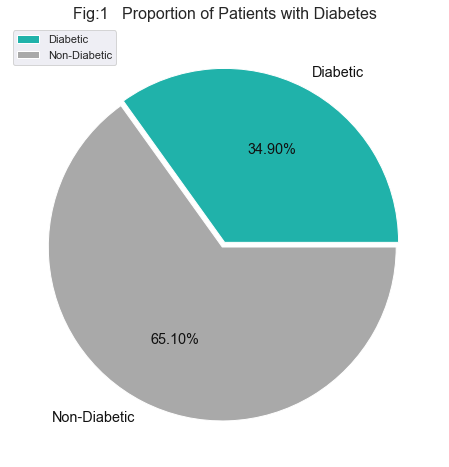

In [9]:
#Create a list that contains the number of diabetic patients 
Diabetic_list = [diab_df.Outcome[diab_df['Outcome']==1].count(), diab_df.Outcome[diab_df['Outcome']==0].count()]
#set figure size and title
plt.subplots(figsize=(8, 8))
plt.title('Fig:1   Proportion of Patients with Diabetes', size = 16)

#display the proportion of Customer Churn
plt.pie(Diabetic_list,labels = ['Diabetic', 'Non-Diabetic'], autopct='%.2f%%',
        explode = (0 ,0.03),textprops={'color':"#111",'size': "x-large"}, colors = ['lightseagreen','darkgrey'])
plt.legend(labels = ['Diabetic', 'Non-Diabetic'], loc = "upper left",prop={'size': 11})

plt.savefig("Pie.jpg",bbox_inches='tight',dpi =200)


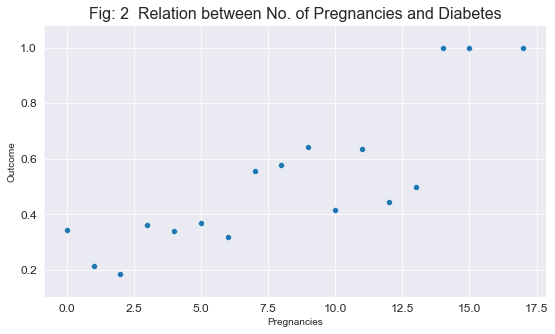

In [10]:
# Visualize Relation between Tenure & Churn rate
plot_by_Pregnancy = diab_df.groupby('Pregnancies').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 2  Relation between No. of Pregnancies and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["Pregnancies"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter1.jpg",bbox_inches='tight',dpi =200)

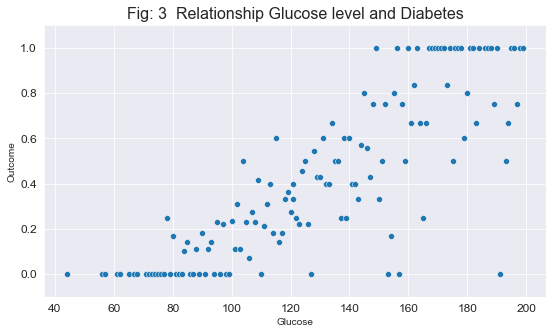

In [11]:
# Visualize Relationship Glucose Level and Diabetes 
plot_by_Pregnancy = diab_df.groupby('Glucose').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 3  Relationship Glucose level and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["Glucose"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter2.jpg",bbox_inches='tight',dpi =200)

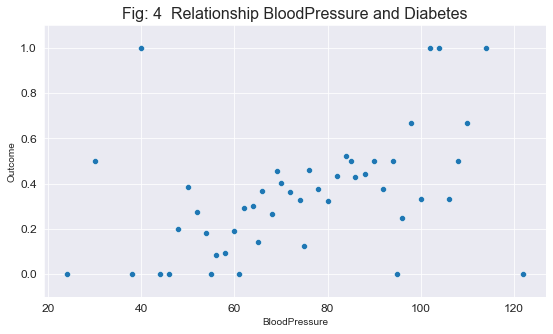

In [12]:
# Visualize Relationship BloodPressure and Diabetes 
plot_by_Pregnancy = diab_df.groupby('BloodPressure').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 4  Relationship BloodPressure and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["BloodPressure"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter3.jpg",bbox_inches='tight',dpi =200)

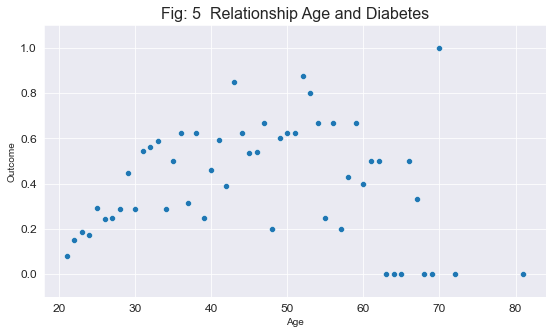

In [13]:
# Visualize Relationship BloodPressure and Diabetes 
plot_by_Pregnancy = diab_df.groupby('Age').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 5  Relationship Age and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["Age"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter4.jpg",bbox_inches='tight',dpi =200)

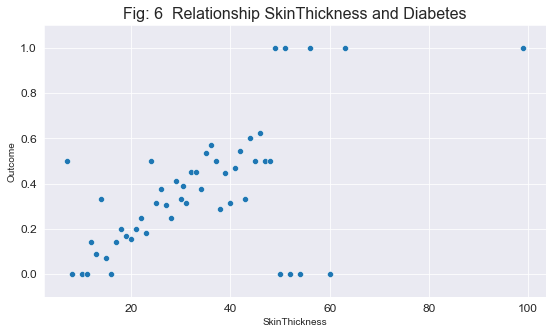

In [14]:
# Visualize Relationship SkinThickness and Diabetes 
plot_by_Pregnancy = diab_df.groupby('SkinThickness').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 6  Relationship SkinThickness and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["SkinThickness"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter5.jpg",bbox_inches='tight',dpi =200)

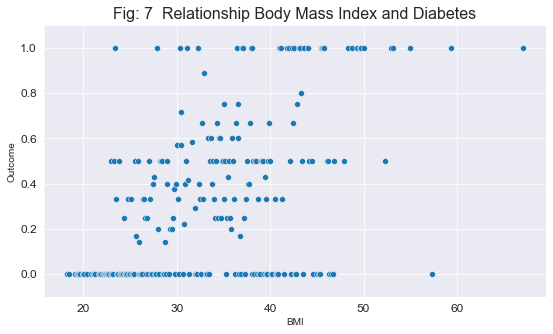

In [15]:
# Visualize Relationship Body Mass Index and Diabetes 
plot_by_Pregnancy = diab_df.groupby('BMI').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 7  Relationship Body Mass Index and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["BMI"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter6.jpg",bbox_inches='tight',dpi =200)

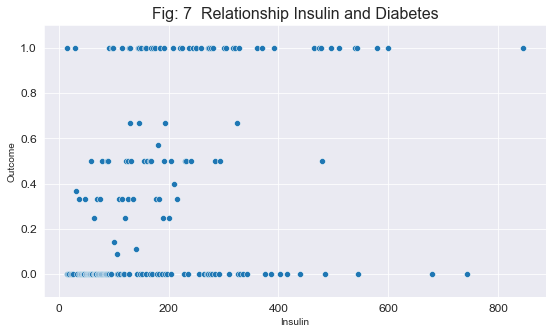

In [16]:
# Visualize Relationship Insulin and Diabetes 
plot_by_Pregnancy = diab_df.groupby('Insulin').Outcome.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 7  Relationship Insulin and Diabetes', size = 16)
g = sns.scatterplot(x=plot_by_Pregnancy["Insulin"],y=plot_by_Pregnancy["Outcome"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter7.jpg",bbox_inches='tight',dpi =200)

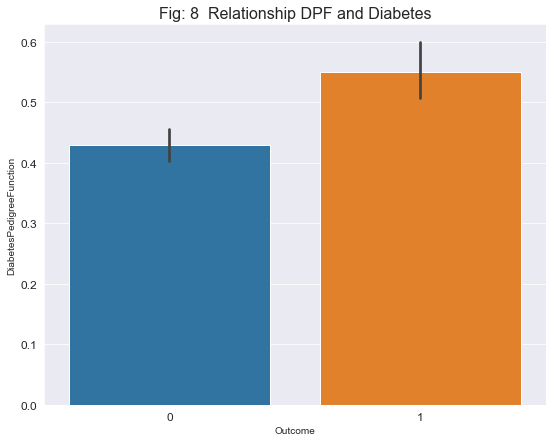

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))
b = sns.barplot(x = 'Outcome',y = 'DiabetesPedigreeFunction',data = diab_df)
plt.title('Fig: 8  Relationship DPF and Diabetes', size = 16)
fig.savefig("bar1.jpg",bbox_inches='tight',dpi =200)

**Summary Highlights**
- About 65% of the patients have diabetes and 25% have no diabetes.The imbalance in the data can be clearly seen with 0 (Non-Diabetic) being the modal class. We will treat this imbalance later in the process. **(Fig 1)**

- The chances of diabetes is gradually increasing with level of Glucose. **(Fig 3)**

- Diabetes is less common in patients with a higher DPfunctin levels. **(fig 8)**

- As Blood Pressure increase there is a higher chance of being diagnosed with diabetes. **(fig 4)**

-  However, for Non-Diabetics, Insulin is a little higher. It can be roughly hypothesized that Insulin for Diabetics is lower than Non-Diabetics. **(Fig 7)**

- Women with a lot of pregnacies have a higher chance of being diangnosed with diabetes. **(Fig 2)**

- Skin Thickness for Diabetics is more than that of Non-Diabetics. **(Fig 6)**

- As people increase in age, they are susceptible to diabetes. **(Fig 5)**

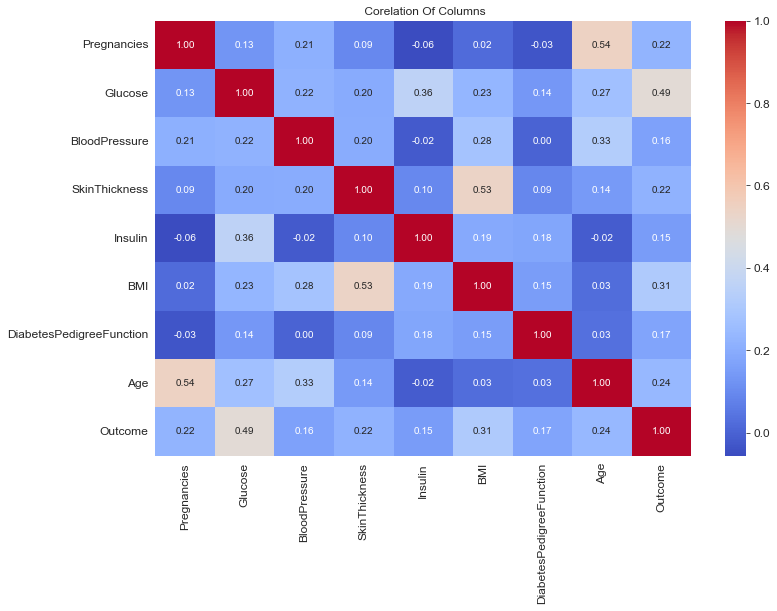

In [18]:
# Corelation

plt.figure(figsize=(12,8))
corr_columns = diab_df.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title(' Corelation Of Columns')

plt.savefig("Corr.jpg",bbox_inches='tight',dpi =200)

From graph ,we observe there is a weak positive correletion between the independent variable and Outcome. 

By a rule of thumb, in case of an r above 0.70, multi-collinearity is expected. Hence, no significant case of multi-collinearity is observed.

Also there not much correlation between features except for some values that are greater than 0.5 The features are:

- Age-Pregnancies : Pregnancies can increase with age and stop after a certain age
- Glucose-Diabetes : Higher glucose count has higher probability of being diagnose with diabetes
- Glucose-Insulin : Higher level Glucose means more Insulin

# Model Building (Linear Models)

## Feature Engineering

minMax scaling is performrd for the linear models to of center the data and scale each feature to unit variance
This way, all the features are brought on the same scale 

### Minmax Scaling

In [19]:
# minMax scaling the continuous variables
continuous_vars =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'] 
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
diab_df[continuous_vars]=pd.DataFrame(minmax.fit_transform(diab_df[continuous_vars]))
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.255435,0.019832,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


### Resampling (OverSampling) 

Because 35% of the patients have diabetes, the baseline model may be able to predict with only 35% accuracy of predicting diabetes. This is a problem since the data is slightly imbalance. This will create a bias in our accuracy because, the accuracy will be shifted more towards patients without diabetes 65%. To prevent this we will perform oversampling on our dataset.

In [20]:
# Checking the shape of the Outcome by class
Diabetic = diab_df[diab_df['Outcome']==1]
Non_Diabetic = diab_df[diab_df['Outcome']==0]
print(Diabetic.shape,Non_Diabetic.shape)

(268, 9) (500, 9)


In [21]:
#Create independent and Dependent Features
columns = diab_df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Outcome"]]
# Store the variable we are predicting 
target = "Outcome"
# Define a random state 
state = np.random.RandomState(42)
X = diab_df[columns]
Y = diab_df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [22]:
from imblearn.over_sampling import SMOTE
# Implementing Oversampling for Handling Imbalanced 
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


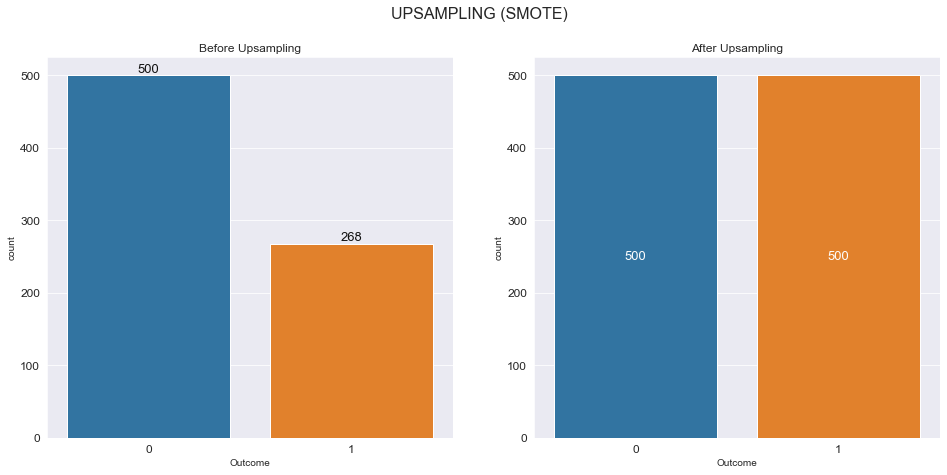

In [24]:
#Plot of original data before and after resampling

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('UPSAMPLING (SMOTE)', size = 16)

#Count of original data before resampling
g= sns.countplot(ax= axes[0], x="Outcome",data=diab_df)
g.bar_label(axes[0].containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111")
axes[0].set_title("Before Upsampling")

# Count of data after resampling
a= sns.countplot(ax= axes[1], x=y_res,data=diab_df)
a.bar_label(axes[1].containers[0], label_type='center',fmt="%g",fontsize=13, color = "w")
axes[1].set_title('After Upsampling')

#Save plot as Picture.
fig.savefig("Resample.jpg",bbox_inches='tight',dpi =200)



### Training Linear Models

In [25]:
X= X_res
y= y_res

In [26]:
#Split the data into training set (75%) and test set (25)%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

To choose the best model, the first 4 non-esemble techniques classification models are compared and the best one is selected based on their accuracy score since the data is balanced

In [27]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [28]:
#Fit the logistic Regression Model
logit = LogisticRegression(random_state=50)
logit.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logit.predict(X_test)

# Find Accuracy using accuracy_score method
logit_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
logit_recall = round(metrics.recall_score(y_test,pred)*100, 2)
logit_precision = round(metrics.precision_score(y_test,pred)*100, 2)
logit_f1 = round(metrics.f1_score(y_test,pred)*100, 2)


In [29]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)
#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
svc_recall = round(metrics.recall_score(y_test,svc_pred)*100, 2)
svc_f1 = round(metrics.f1_score(y_test,svc_pred)*100, 2)

In [30]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
knn_recall = round(metrics.recall_score(y_test,knn_pred)*100, 2)
knn_precision = round(metrics.precision_score(y_test,knn_pred)*100, 2)
knn_f1 = round(metrics.f1_score(y_test,knn_pred)*100, 2)

In [31]:
#Fit the Naive Bayes Classifier
bcmodel = GaussianNB()
bcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
bc_pred = bcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
bc_accuracy = round(metrics.accuracy_score(y_test, bc_pred) * 100, 2)
bc_recall = round(metrics.recall_score(y_test,bc_pred)*100, 2)
bc_precision = round(metrics.precision_score(y_test,bc_pred)*100, 2)
bc_f1 = round(metrics.f1_score(y_test,bc_pred)*100, 2)


### Comparison Of Non Tree Based Models

In [32]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              "NaiveBayes Classifier"],
    'Accuracy': [logit_accuracy, svc_accuracy, knn_accuracy, 
              bc_accuracy],
    'F1-Score': [logit_f1, svc_f1, knn_f1, 
              bc_f1],
    "Recall": [logit_recall,svc_recall,knn_recall,bc_recall]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
mod = Model_Comparison_df.reset_index()
dfi.export(mod,"mytable2.jpg")

In [33]:
mod

,Model,Accuracy,F1-Score,Recall
0,K-Nearest Neighbor,75.6,75.70,80.51
1,Logistic Regression,68.4,65.50,63.56
2,Support Vector Machine,68.4,65.20,62.71
3,NaiveBayes Classifier,65.2,59.91,55.08


From the Model comparison above k-Nearest Neigbor had the highest accuracy score and F1-Score after smote upsampling

# Training Tree-Based Models

The reason for this division is that unlike linear based models, tree models require a differenrt procedures in feature engineering before training. In this project Minmax Scaling was dropped before training them. 

In [34]:
# import dataframe
df = pd.read_csv("diabetes.csv")

####  Data Pre-processing

In [35]:
# Correct 0 values in SkinThickness
df['SkinThickness'] = df['SkinThickness'].replace(0,df['Insulin'].median())

# Correct 0 values in Insulin 
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

# Correct 0 values in Glucose
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

# Correct 0 values in BloodPressure
df['BloodPressure'] =df['BloodPressure'].replace(0,df['BloodPressure'].mean())

# Correct 0 values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

### SMOTE OVERSAMPLING

In [36]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Outcome"]]
# Store the variable we are predicting 
target = "Outcome"
# Define a random state 
state = np.random.RandomState(42)
X1 = df[columns]
Y1 = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X1.shape[0], X1.shape[1]))
# Print the shapes of X & Y


from imblearn.over_sampling import SMOTE
# Implementing Oversampling for Handling Imbalanced 
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_res1, y_res1 = sm.fit_resample(X1, Y1)
print(X_res1.shape)
print(y_res1.shape)

(1000, 8)
(1000,)


### Train Tree_Esemble Based Models

In [37]:
#Declare the independent and dependent variables
X1 = X_res1
y1=y_res1

In [38]:
#Split the data into training set (75%) and test set (25)
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 50)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X1_train, y1_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X1_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y1_test, dt_pred) * 100, 2)
dt_recall = round(metrics.recall_score(y1_test,dt_pred)*100, 2)
dt_precision = round(metrics.precision_score(y1_test,dt_pred)*100, 2)
dt_f1 = round(metrics.f1_score(y1_test,dt_pred)*100, 2)

In [41]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 50)
rfmodel.fit(X1_train, y1_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X1_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y1_test, rf_pred) * 100, 2)
rf_recall = round(metrics.recall_score(y1_test,rf_pred)*100, 2)
rf_precision = round(metrics.precision_score(y1_test,rf_pred)*100, 2)
rf_f1 = round(metrics.f1_score(y1_test,rf_pred)*100, 2)

In [42]:
#Fit the XgBoost Classifier 
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X1_train, y1_train)

#Predict the value for new, unseen data
xg_pred = model.predict(X1_test)

# Find Accuracy using accuracy_score method
xg_accuracy = round(metrics.accuracy_score(y1_test, xg_pred) * 100, 2)
xg_recall = round(metrics.recall_score(y1_test,xg_pred)*100, 2)
xg_precision = round(metrics.precision_score(y1_test,xg_pred)*100, 2)
xg_f1 = round(metrics.f1_score(y1_test,xg_pred)*100, 2)

## Model Comparison for tree-based models

In [43]:
# Compare Several models according to their Accuracies
Model_Comparison1 = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [dt_accuracy,rf_accuracy , xg_accuracy],              
    'F1-Score': [dt_f1,rf_f1, xg_f1],
    "Recall": [rf_recall,xg_recall,dt_recall]})       
Model_Comparison_df1 = Model_Comparison1.sort_values(by='Accuracy', ascending=False)
Model_Comparison_df1 = Model_Comparison_df1.set_index('Model')
ma=Model_Comparison_df1.reset_index()
dfi.export(ma,"mytable3.jpg")

In [44]:
ma

,Model,Accuracy,F1-Score,Recall
0,Random Forest,85.0,85.00,88.04
1,XGBoost,81.5,81.41,73.91
2,Decision Tree,74.5,72.73,92.39


From the Model comparison above Random Forest had the highest accuracy score and F1-Score after up-sampling, before making predictions with it we will plot the confusion matrix to see how well the model did in predictions.

## Model Comaprison Using ROC and AUC - Score

After training the classifier on train dataset, we are using the model to predict the target values for test dataset. We are storing the predicted class from the seven models and we will use it to get their ROC AUC scores. AUC score (Area Under Curves calculates) the predictive power of the models. Before Model selection, we will compare their AUC,Accuracy and F1-Scores.

In [45]:
# Predicted class for each model
y_score1 = logit.predict_proba(X_test)[:,1]
y_score2 = svcmodel.predict_proba(X_test)[:,1]
y_score3 = knnmodel.predict_proba(X_test)[:,1]
y_score4 = bcmodel.predict_proba(X_test)[:,1]
y_score5 = dtmodel.predict_proba(X1_test)[:,1]
y_score6 = rfmodel.predict_proba(X1_test)[:,1]
y_score7 = model.predict_proba(X1_test)[:,1]

In [46]:
#Calculating the False and True Positive Rates and Their Threshold for the ROC_Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y1_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y1_test, y_score6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y1_test, y_score7)

In [47]:
#Calculate the AUC's for respective Models
auc1= round(roc_auc_score(y_test, y_score1),4)
auc2= round(roc_auc_score(y_test, y_score2),4)
auc3= round(roc_auc_score(y_test, y_score3),4)
auc4= round(roc_auc_score(y_test, y_score4),4)
auc5= round(roc_auc_score(y1_test, y_score5),4)
auc6= round(roc_auc_score(y1_test, y_score6),4)
auc7= round(roc_auc_score(y1_test, y_score7),4)

# Compare Several models with their Roc
Model_Comparison2 = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost','Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              "NaiveBayes Classifier"],
    'ROC_AUC-Score': [auc5,auc6,auc7,auc1,auc2,auc3,auc4]}) 
             
Model_Comparison_df2 = Model_Comparison2.sort_values(by='ROC_AUC-Score', ascending=False)
Model_Comparison_df2 = Model_Comparison_df2.set_index('Model')
Model_Comparison_df2=Model_Comparison_df2.reset_index()
dfi.export(Model_Comparison_df2,"mytable4.jpg")

### Plot Roc- Curves

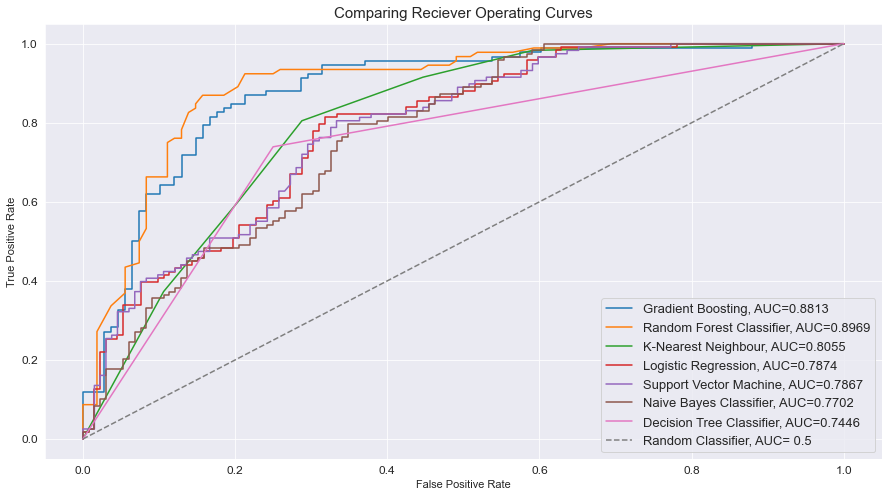

In [48]:
#set up plotting area
plt.figure(figsize=(15,8))
plt.title("Comparing Reciever Operating Curves",size = 15)
plt.ylabel('True Positive Rate',size = 11)
plt.xlabel('False Positive Rate',size = 11)
#Plot the ROC Curves for each classifier
plt.plot(false_positive_rate7,true_positive_rate7,label="Gradient Boosting, AUC="+str(auc7))
plt.plot(false_positive_rate6,true_positive_rate6,label="Random Forest Classifier, AUC="+str(auc6))
plt.plot(false_positive_rate3,true_positive_rate3,label="K-Nearest Neighbour, AUC="+str(auc3))
plt.plot(false_positive_rate1,true_positive_rate1,label="Logistic Regression, AUC="+str(auc1))
plt.plot(false_positive_rate2,true_positive_rate2,label="Support Vector Machine, AUC="+str(auc2))
plt.plot(false_positive_rate4,true_positive_rate4,label="Naive Bayes Classifier, AUC="+str(auc4))
plt.plot(false_positive_rate5,true_positive_rate5,label="Decision Tree Classifier, AUC="+str(auc5))
plt.plot([0, 1], ls="--",label="Random Classifier, AUC= 0.5")
#add legend
plt.legend(prop={"size":13},loc=0)

plt.savefig("AUC.jpg",bbox_inches='tight',dpi =200)

- Note: The closer the AUC score to 1 the better the model
- The Random Forest classifier got the best AUC of all the Classification Algorithms, measuring 0.8966. It demonstrates that the model can distinguish between positive and negative classes with approximately 90% probability. However, the Gradient Boosting came in second with a score of 0.8813. In that case, there is approximately 88% chance that the Random Forest Classifier can distinguish between positive and negative classifications.

### Comparing All Classification Models used

In [49]:
Models_Comp = pd.concat([Model_Comparison_df, Model_Comparison_df1], axis = 0)
Models_Comp = Models_Comp.sort_values(by='Accuracy', ascending=False)
Models_Comp=Models_Comp.reset_index()

In [50]:
result = pd.merge(Models_Comp, Model_Comparison_df2, on="Model")
result

dfi.export(result,"mytable10.jpg")

In [51]:
result

,Model,Accuracy,F1-Score,Recall,ROC_AUC-Score
0,Random Forest,85.0,85.00,88.04,0.8969
1,XGBoost,81.5,81.41,73.91,0.8813
2,K-Nearest Neighbor,75.6,75.70,80.51,0.8055
3,Decision Tree,74.5,72.73,92.39,0.7446
4,Logistic Regression,68.4,65.50,63.56,0.7874
5,Support Vector Machine,68.4,65.20,62.71,0.7867
6,NaiveBayes Classifier,65.2,59.91,55.08,0.7702


Comparing the seven classification models used, Random Forest had the higest evaluation scores. What we want to prevent is a low Recall score, which means we miss over a higher number of the people with positive diagnosis, which is not acceptable in our case.
Random Forest after SMOTE provides the highest overall Accuracy and a highest F1-score and a higher Recall score, it means that, the model can capture a higher number of diabetes, which makes this classifier the most suitable for our purposes among the three. Therefore we conclude and select the Random Forest Classifier as our model. 

## Classification Report.

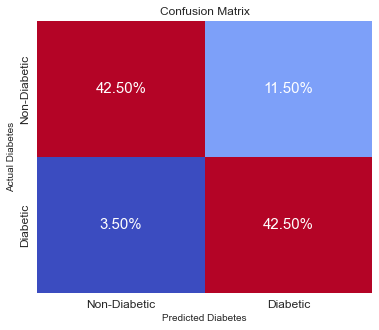

In [112]:
#Generate confusion matrix for the RandomForest model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_rfmodel = confusion_matrix(y1_test,rf_pred)
plt.figure(figsize=(6,5))
ax= plt.subplot()
sns.heatmap(conf_mat_rfmodel/np.sum(conf_mat_rfmodel),annot = True,fmt='.2%',cmap = "coolwarm",cbar = False,annot_kws={'fontsize': 15,  'color':'w'})
# labels, title and ticks
ax.set_xlabel('Predicted Diabetes');ax.set_ylabel('Actual Diabetes'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Diabetic', 'Diabetic']); ax.yaxis.set_ticklabels(['Non-Diabetic', 'Diabetic']);

plt.savefig("ConfMat1.jpg",dpi = 200)

The proportion of the population who has diabetes is about 42.50% which indicates that more than 260 people have the diabetes disease. We also have about 92% (sensitivity) of those who tested positive given that they have diabetes and 79% of those who tested negative given that they do not have diabetes. With the accuracy, we are 95% confidence that the accuracy of our model from the patients who have diabetes will fall within the range of 80% to 92%.

Before we decide on this model, let check whether the model is overfitting or underfitting

In [53]:
#accuracy of test data
rf_pred = rfmodel.predict(X1_test)
rf_accuracy = round(metrics.accuracy_score(y1_test, rf_pred) * 100, 2)

#accuracy of train data
rf_pred1 = rfmodel.predict(X1_train)
rf_accuracy2 = round(metrics.accuracy_score(y1_train, rf_pred1) * 100, 2)

print("accuracy of test data:",rf_accuracy,"%")
print("accuracy of train data:",rf_accuracy2,"%")

accuracy of test data: 85.0 %
accuracy of train data: 100.0 %


### Random Forest hyperparameter tuning with RandomSearchCV

Before we use this model for prediction, we need to check whether our model is overfitting or underfitting.From our result we found out that the model is overfitting, this is a bad indication, since our train set has a 100% accuracy, the model will perform poorly in unseen data. So we solve this problem by performing random forest hyperparameter tuning with GridSearchCV

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop =90 , num = 12)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,11]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10,15,100,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion =["gini","entropy"]

In [94]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               "criterion":criterion}
print(param_grid)

{'n_estimators': [2, 10, 18, 26, 34, 42, 50, 58, 66, 74, 82, 90], 'max_depth': [2, 4, 6, 11], 'min_samples_split': [2, 5, 10, 15, 100, 50], 'min_samples_leaf': [1, 2, 5, 10, 15], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [95]:
rfmod = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 50)

In [102]:
#Genrate a GridSearchCV with random forest as the estimator, and a cross validation of 3
from sklearn.model_selection import RandomizedSearchCV
rs_Grid = RandomizedSearchCV(estimator = rfmod, param_distributions=param_grid, cv = 3, verbose=-1,n_jobs = -1,n_iter=11,scoring="accuracy")

In [105]:
rs_Grid.fit(X1_train, y1_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=50),
                   n_iter=11, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 11],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              50],
                                        'n_estimators': [2, 10, 18, 26, 34, 42,
                                                         50, 58, 66, 74, 82,
                                                         90]},
                   scoring='accuracy', verbose=-1)

### Check For Overfitting

In [106]:
# accuracy of test data
rs_Grid_pred1 = rs_Grid.predict(X1_test)
rs_Grid_accuracy1 = round(metrics.accuracy_score(y1_test,rs_Grid_pred1) * 100, 2)

#accuracy of train data
rs_Grid_pred2 = rs_Grid.predict(X1_train)
rs_Grid_accuracy2 = round(metrics.accuracy_score(y1_train, rs_Grid_pred2) * 100, 2)

print("accuracy of test data:",rs_Grid_accuracy1,"%")
print("accuracy of train data:",rs_Grid_accuracy2,"%")

accuracy of test data: 83.0 %
accuracy of train data: 99.38 %


From the result above we can see the hyperparameter tuning has solved this issue but at a cost of decreasing the accuracy of the model but since its not really significant we accept the result and conclude by checking the classification report

### Confusion Matrix after Hyperparameter Tuning

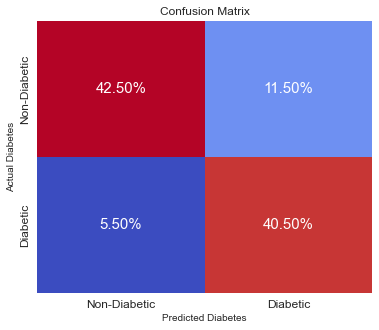

In [111]:
#Generate confusion matrix for the RandomForest model as it has maximum Accuracy
conf_mat_rfmodel = confusion_matrix(y1_test,rs_Grid_pred1)
plt.figure(figsize=(6,5))
ax= plt.subplot()
sns.heatmap(conf_mat_rfmodel/np.sum(conf_mat_rfmodel),annot = True,fmt='.2%',cmap = "coolwarm",cbar = False,annot_kws={'fontsize': 15,  'color':'w'})
# labels, title and ticks
ax.set_xlabel('Predicted Diabetes');ax.set_ylabel('Actual Diabetes'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Diabetic', 'Diabetic']); ax.yaxis.set_ticklabels(['Non-Diabetic', 'Diabetic']);
plt.savefig("ConfMat2.jpg",dpi = 200)

The model’s accuracy came out to be 0.83 which is 83% after hyperparameter tuning with 17% misclassification. We still managed to get control the reduction of the type II error, where the test will wrongly predict no diabetis but the patient actually has diabetes. This result seems to be quite decent. However since the sample size of the dataset is really small, I strongly believe that the model will still increase in overall accuracy, when large dataset is available for training. 

### Feature Importance

Let see which indendent variable helped a lot in training the dataset. This will give us a great idea of the feature which positively or negatively affects the prediction of diabetes

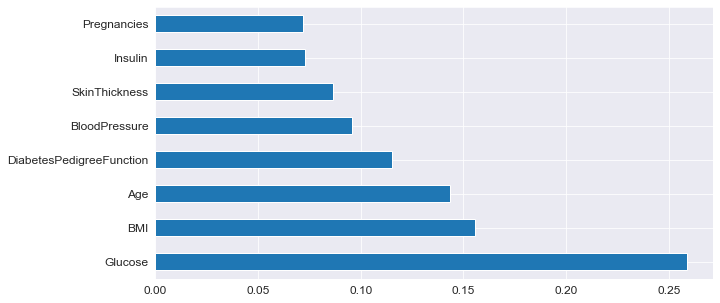

In [113]:
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rfmodel.feature_importances_, index=X1_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.savefig("Feature.jpg",dpi = 200)

The random forest gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.